In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [257]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2


In [258]:
csv_file = os.path.join(path, "Iris.csv")

In [259]:
#Adjust display options to show more content
#I like to see more content in the console for smaller datasets, and not be restrictive of information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [260]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target

**UNDERSTANDING THE DATA**

In [261]:
df = pd.read_csv(csv_file)
#Understanding the data
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [262]:
#I wish to all the different unique 'Species' because it is my dependent variable(target variable)
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [263]:
#Let us see how much data we are dealing with.
df.shape

(150, 6)

In [264]:
#checking the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [265]:
#Checking for any missing values
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [266]:
#Checking for duplicate rows
#As we can see no duplicate rows, as duplicate rows will bias my results.
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [267]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [268]:
#Let us create a dataframe without the Id variable, because Id variable has no correlation to anything in the dataset.
df_without_id = df.drop(columns=['Id'])

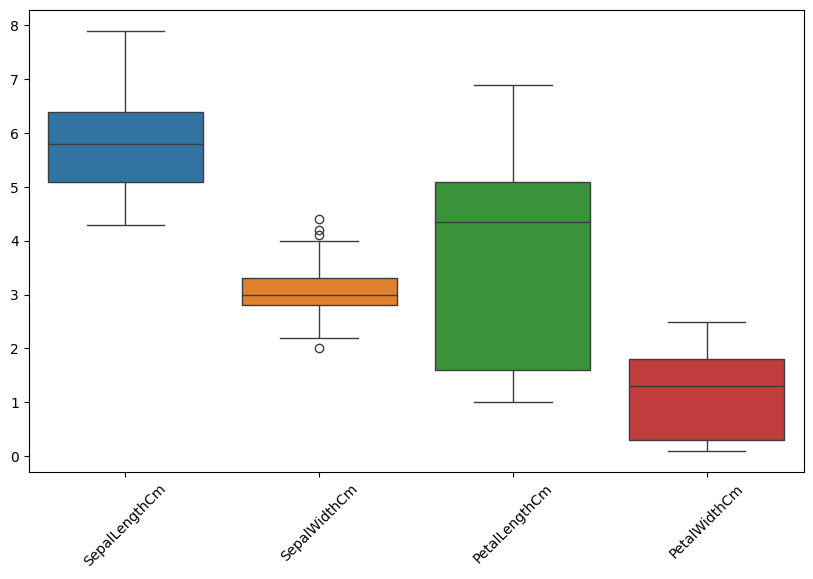

In [269]:
#Look for outliers
#As we can see that 'SepalWidthCm' has couple outliers. In this project I have not decided to remove these outliers yet, because I don't think they will cause much variance to my models as they are very close to the Maximum and Minimum lines of the boxplot.
#Also I am limited to 150 samples and do not wish to reduce it any further, but if I see that these outliers are skewing the distribution I will not hesitate to remove them.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_without_id)
plt.xticks(rotation=45)
plt.show()

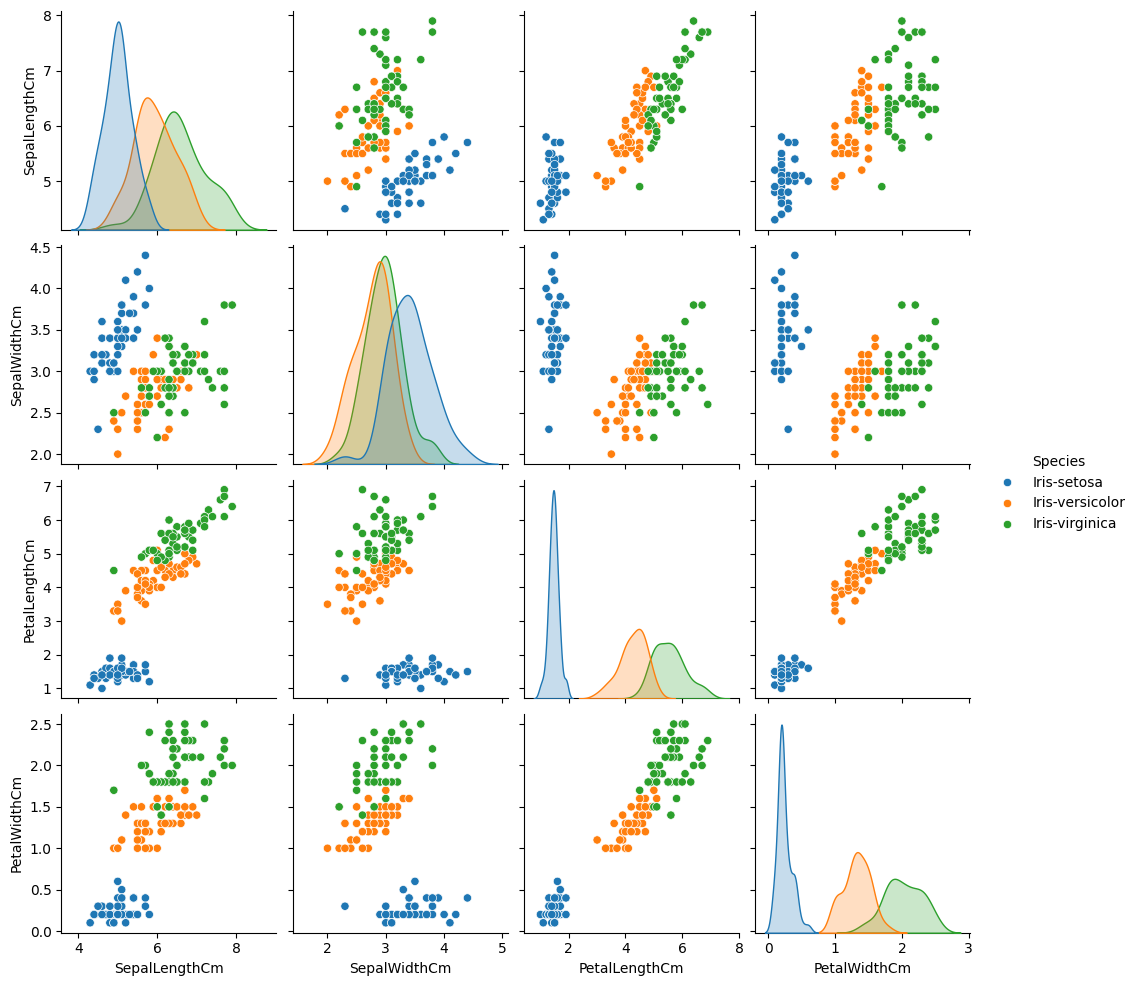

In [270]:
#We will visualize all the variables using pairplot but in this case we will drop the Id variable since it has no correlation from the rest of the dataset.
#This visualization is imortant because we see the relationships between all the variables, we all see the patterns and trends from the scatter plots.
#For example, SepalLengthCm vs SepalWidthCm scatterplot, shows us each individual flowers Sepal measurements and plots it on a scatterplot.
#When we use hue='Species', we can see how each flower Species looks like in colorful detail.
#One thing to note, the diagonal histograms represents how tightly grouped or how widely spread out they are. Hence why the std deviation is smaller for 'setosa' flower than the other two.
sns.pairplot(df_without_id, hue='Species')
plt.show()

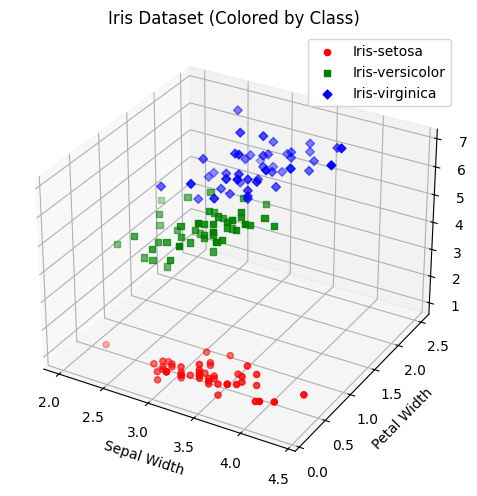

In [294]:
#Let's step it up a notch and create a 3D scatterplot with wonderful colors and easy to read axis
#First lets define the colors and define the markers
#For setosa I will be using a red circle, for versicolor i will use green squares, and for virginica I will use blue diamonds
colors = {0: 'red', 1: 'green', 2: 'blue'}
markers = {0: 'o', 1: 's', 2: 'D'}

fig = plt.figure(figsize=(12, 5))

# 3D scatterplot
ax2 = fig.add_subplot(111, projection='3d')

# define species names for mapping
species_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Plot each species separately with different colors and markers
#To better understand this code first it loops(for) over each unique species code in the dataset and grabs the corresponding species name
#Then it selects the data for that species, and then plots the Sepal Width, Petal Width, and Petal Length on a 3D scatter plot.
#Each species is represented by a different color and a different marker shape, making it easier to visually distinguish between them in the plot.
for species_code in df["Species"].unique():
    species_name = species_names[species_code]  # Get species name from the code
    subset = df[df["Species"] == species_code]
    ax2.scatter(subset["SepalWidthCm"], subset["PetalWidthCm"], subset["PetalLengthCm"],
                c=colors[species_code], label=species_name, marker=markers[species_code])

# Set labels for the axes
ax2.set_xlabel('Sepal Width')
ax2.set_ylabel('Petal Width')
ax2.set_zlabel('Petal Length')

# Set title and legend
ax2.set_title("Iris Dataset (Colored by Class)")
ax2.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


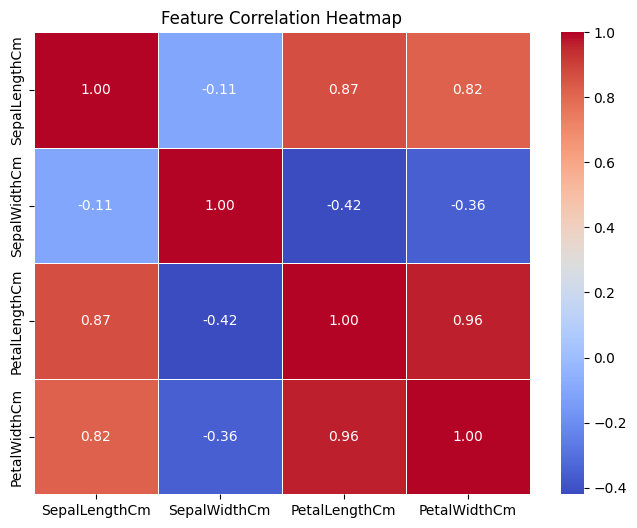

In [272]:
#Feature Correlation Heatmap
#As we can see that Petal Length and Petal Width are highly correlated and could be useful features for classification.
#Sepal Width has weak correlation with others and may not be a strong predictor.
plt.figure(figsize=(8, 6))
sns.heatmap(df_without_id.drop(columns=['Species']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



In [273]:
# Grouping the data by 'Species' and calculating summary statistics
#Summary statistic helps us see how the data is distributed
#I have used the .T to view the data. frame as a row for clearer information
#Also renamed the columns for cleaner table
summary_statistic = df.groupby('Species')[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].describe()
summary_statistic = summary_statistic.T
summary_statistic.columns = ['Setosa', 'Versicolor', 'Virginica']
print(summary_statistic)

                        Setosa  Versicolor  Virginica
SepalLengthCm count  50.000000   50.000000  50.000000
              mean    5.006000    5.936000   6.588000
              std     0.352490    0.516171   0.635880
              min     4.300000    4.900000   4.900000
              25%     4.800000    5.600000   6.225000
              50%     5.000000    5.900000   6.500000
              75%     5.200000    6.300000   6.900000
              max     5.800000    7.000000   7.900000
SepalWidthCm  count  50.000000   50.000000  50.000000
              mean    3.418000    2.770000   2.974000
              std     0.381024    0.313798   0.322497
              min     2.300000    2.000000   2.200000
              25%     3.125000    2.525000   2.800000
              50%     3.400000    2.800000   3.000000
              75%     3.675000    3.000000   3.175000
              max     4.400000    3.400000   3.800000
PetalLengthCm count  50.000000   50.000000  50.000000
              mean    1.4640

**LEARNING FROM THE DATA**

In [274]:
#Decision Tree
#I will skip standardization/Normalization because I will not be using Models that need to scale.
#Rather I will be using Decision Trees and Random Forest, etc.
# We must drop our Target Variable in order to train test split
X = df.drop('Species', axis = 1)
# Y will be our dependent variable (Target variable)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [275]:
#Let us talk about the results
#We got an accuracy of 1.0 which is as good as it gets. The model has predicted correctly all 30 instances of the test. We can see how many instances of each Species by adding up the support(number of occurrences of each class in the dataset) in the classification report.
#Precision tells us how many predicted positive cases were correct, and as we can see from the 1.00 that all of them were correct.
#Recall indicates how many of the actual positive cases the model correctly identified and 1.00 means the model correctly identified all actual instances of each class.
#The F1-score is the Harmonic mean(used for rates or ratios and gives more weight to smaller values) of precision and recall. A score of 1.00 means the model is perfectly balanced in terms of precision and recall for each class.
#TLDR Very Good Results!!

**Random Forest Classification**

In [276]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [277]:
#Random Forest classification yielded the exact same results as Decision tree classification.
#Iris Classification dataset might be too well behaved and small for classification tools like Random Forest.
#We can also conclude that the dataset is easy to classify and that both models have learned the patterns well.

In [278]:
# Initialize the k-NN Classifier (with k=3, for example)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Support Vector Machine**

In [279]:
#First split into training & test sets
#Secondly we will standardized the features, I know previously I said I would not standardize my features but for support vector machines they are very sensitive to feature scales.
#Third we will train SVM model
#Lastly we will evaluate the model using accuracy, classification report, and confusion matrix

In [280]:
# Map 'Species' to their unique names
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(species_mapping)

# define x and y
X = df.drop(columns=['Species'])  # Independent variables
y = df['Species']  # Dependent variable

#80% training, 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



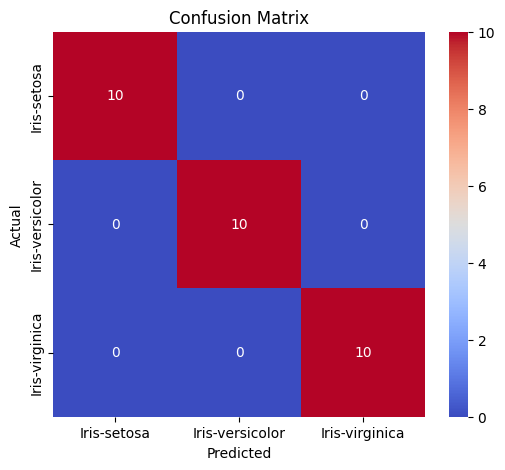

In [282]:
# Initialize SVM classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear')

# Train
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Conclusion:** In this study we imported, understood and learned the iris flower classification data. We used the kagglehub library to import our data, checked for missing values, duplicate values and outliers. Then in order to visualize the data we used graphs like scatter plot, heatmap,etc...  Lastly we applied multiple machine learning algorithms to classify the Iris dataset, which contains three distinct species: Iris-setosa, Iris-versicolor, and Iris-virginica. After the analysis, we used several models, including Decision Tree, Random Forest, and Support Vector Machine (SVM), to assess their performance. All three models—Decision Tree, Random Forest, and Support Vector Machine—performed exceptionally well with 100% accuracy on the Iris dataset. The results suggest that the features in the dataset (sepal and petal dimensions) are well-suited for classification, as these models were able to separate the species with perfect precision.